# 5. Space and Motion

In [1]:
import itertools

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib import (
    animation,
    rc
)
rc("animation", html = "jshtml")

from sympy import symbols
from sympy.geometry import (
    Point,
    Segment,
    Triangle
)
from sympy.plotting import plot

The idea of space, measured with distances, requires not rational numbers but real numbers; this is simply revealed through the distance of the long length of an isosceles right triangle with legs of length 1:

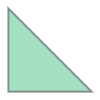

In [2]:
a = Point(0, 0)
b = Point(1, 0)
c = Point(0, 1)

triangle = Triangle(a, b, c)
triangle

In [3]:
triangle.angles

{Point2D(0, 1): pi/4, Point2D(0, 0): pi/2, Point2D(1, 0): pi/4}

In [4]:
triangle.area

1/2

In [5]:
triangle.is_right()

True

In [6]:
hypotenuse_length = triangle.sides[1].length
hypotenuse_length

sqrt(2)

In [7]:
def distance(p, q):
    """ Distances as difference between points. """
    ln = Segment(p, q)
    return ln.length

distance(a, b)

1

In [8]:
distance(b, a)

1

In [9]:
distance(a, b) == distance(b, a)

True

In [10]:
distance(a, b) == 0 and a == b

False

In [11]:
distance(a, a) == 0 and a == a

True

In [12]:
def triangle_axiom(p, q, r):
    """ Distance is always longer or equivalent if through point r. """
    long_distance = distance(p, q)
    summed_short_distances = distance(p, r) + distance(r, q)
    return long_distance <= summed_short_distances

# Redefine a & b here for clarity
a = Point(0, 0)
b = Point(1, 0)
d = Point(.5, 0)

triangle_axiom(a, b, d)

True

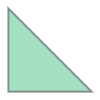

In [13]:
def parameterized_motion_2d_x(fig, t):
    """
    fig -- the figure to be moved.
    t   -- time
    """
    fig = fig.translate(t, 0)
    return fig

triangle2 = parameterized_motion_2d_x(triangle, 2)
triangle2

In [14]:
fig, ax = plt.subplots()
fig.set_dpi(100)
fig.set_size_inches(5, 2)

patch = plt.Polygon(triangle.vertices)

def init():
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 1)
    ax.set_aspect("equal")
    ax.set_title("Parameterized Motion x = 0 to x + 2")
    ax.add_patch(patch)
    return ax

def animate(i):
    vertices = patch.get_xy()
    vertices = [(x + .02, y) for x, y in vertices]
    patch.set_xy(vertices)
    return patch

ani = animation.FuncAnimation(
    fig,
    animate,
    init_func = init,
    frames = 100,
    interval = 20,
    repeat = False
)

plt.close()
ani

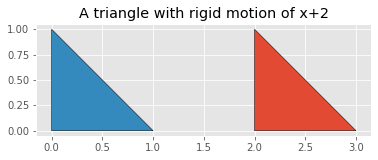

In [15]:
fig, ax = plt.subplots()

tri1 = plt.Polygon(triangle.vertices, ec = "k")
tri2 = plt.Polygon(triangle2.vertices, fc = "C0", ec = "k")

ax.add_patch(tri1)
ax.add_patch(tri2)
ax.set_title("A triangle with rigid motion of x+2")
ax.set_aspect("equal")
ax.autoscale_view()

In [16]:
def is_rigid_motion(figure_1, figure_2):
    """ Check all points of a translated figure have same distance. """
    fig1_dists = list(itertools.combinations(figure_1.vertices, 2))
    fig2_dists = list(itertools.combinations(figure_2.vertices, 2))
    
    if len(fig1_dists) != len(fig2_dists):
        raise ValueError("Figures have different count of points")
    
    distances = []
    for i in range(len(fig1_dists)):
        fig1_dist = distance(fig1_dists[i][0], fig1_dists[i][1])
        fig2_dist = distance(fig2_dists[i][0], fig2_dists[i][1])
        distances.append(fig1_dist == fig2_dist)

    return all(distances)

is_rigid_motion(triangle, triangle2)

True

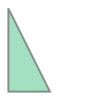

In [17]:
a = Point(0, 0)
b = Point(1, 0)
c = Point(0, 2)
triangle3 = Triangle(a, b, c)
triangle3

In [18]:
is_rigid_motion(triangle, triangle3)

False

Rigid motion is a bijection of space which preserves distances between points.

In [19]:
# C is a composite motion
C = parameterized_motion_2d_x(triangle, 4)

# Here we show the composition of 2 parameterized motions
M = parameterized_motion_2d_x(triangle, 1)
N = parameterized_motion_2d_x(M, 3)

C == N

True

The composite motion can be seen in the formula:

    C = N⋅M

In [20]:
is_rigid_motion(triangle, C)

True

In [21]:
is_rigid_motion(triangle, M)

True

In [22]:
is_rigid_motion(triangle, N)

True

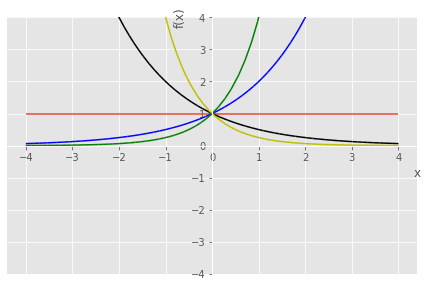

In [23]:
# Here, we just examine powers to the base
x = symbols("x")
abs_limit = 4
p1 = plot(
    1**x,
    (x, -abs_limit, abs_limit),
    ylim = (-abs_limit, abs_limit),
    show = False
)
p2 = plot(2**x, (x, -abs_limit, abs_limit), line_color = "b", show = False)
p3 = plot(4**x, (x, -abs_limit, abs_limit), line_color = "g", show = False)
p4 = plot(.5**x, (x, -abs_limit, abs_limit), line_color = "k", show = False)
p5 = plot(.25**x, (x, -abs_limit, abs_limit), line_color = "y", show = False)

p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.append(p5[0])
p1.show()